# Credit Card Fraud Detection Model

In [1]:
#importing dependencies
import pandas as pd
import numpy as np

In [2]:
#reading data files
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')

In [3]:
#combining data sets
df = pd.concat([df_train,df_test],axis = 1)

In [4]:
df = df_train.append(df_test)

In [5]:
df.reset_index(inplace=True)

## Data Cleaning

In [6]:
df.isnull().sum().any()

False

In [7]:
df = df.rename(columns= {'trans_date_trans_time':'Time','is_fraud':'Class'})

In [8]:
#First we will convert time of transaction(Object) into time data type, and use dob to get age.
df['Time']= pd.to_datetime(df['Time'])

In [9]:
df['trans_hour'] = df['Time'].dt.hour
df['day_of_week'] = df['Time'].dt.day_name()
df['year_month'] = df['Time'].dt.to_period('M')

In [10]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['Time']- df['dob'])/np.timedelta64(1,'Y'))

In [11]:
#Now we will do one hot encoing for categorical data needed.

In [12]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [13]:
df_encoded = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [15]:
#Now we will drop the unwanted columns.
df_encoded.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['index', 'Unnamed: 0', 'Time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'Class', 'trans_hour', 'day_of_week', 'year_month', 'age',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday'],
      dtype='object')>

In [16]:
df_encoded.drop(columns = ['Unnamed: 0', 'Time', 'cc_num', 'merchant', 'category', 'first',
       'last', 'gender', 'street', 'city', 'state','job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'trans_hour', 'day_of_week', 'year_month','zip', 'lat', 'long'], inplace = True)

In [17]:
df_encoded.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['index', 'amt', 'city_pop', 'Class', 'age', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'week_Monday',
       'week_Saturday', 'week_Sunday', 'week_Thursday', 'week_Tuesday',
       'week_Wednesday'],
      dtype='object')>

In [18]:
#Now we can use df for EDA and df_encoded for Model building

# Exploratory data analysis

In [19]:
# Splitting Fraud and Normal transactions in different data frames
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

In [20]:
print(fraud.shape,normal.shape)

(9651, 28) (1842743, 28)


In [21]:
#Let's check the distribution of amount in fraud and normal transactions
fraud.amt.describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: amt, dtype: float64

In [22]:
normal.amt.describe()

count    1.842743e+06
mean     6.765128e+01
std      1.535481e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.724000e+01
75%      8.256000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [23]:
#The mean value for fraud amt is 530.66 compared to 67.66 for normal. Which is very high. 

In [24]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

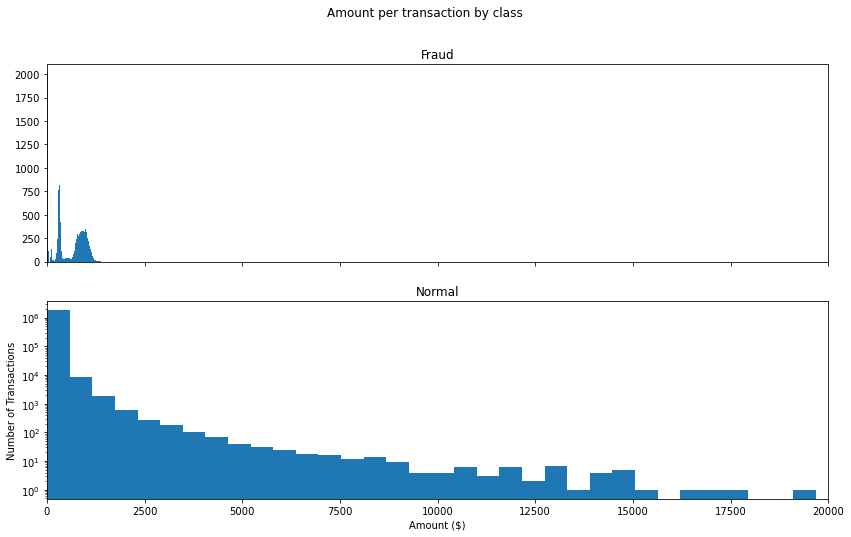

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amt, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amt, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [26]:
#The plot explains the distribution of amount of Normal and Fraud transactions.
#It is clear from the plot that fraud transactions are of very small amount.

(array([ 594., 1287., 1428., 1218., 1564., 1529.,  773.,  589.,  394.,
         275.]),
 array([14. , 22.2, 30.4, 38.6, 46.8, 55. , 63.2, 71.4, 79.6, 87.8, 96. ]),
 <BarContainer object of 10 artists>)

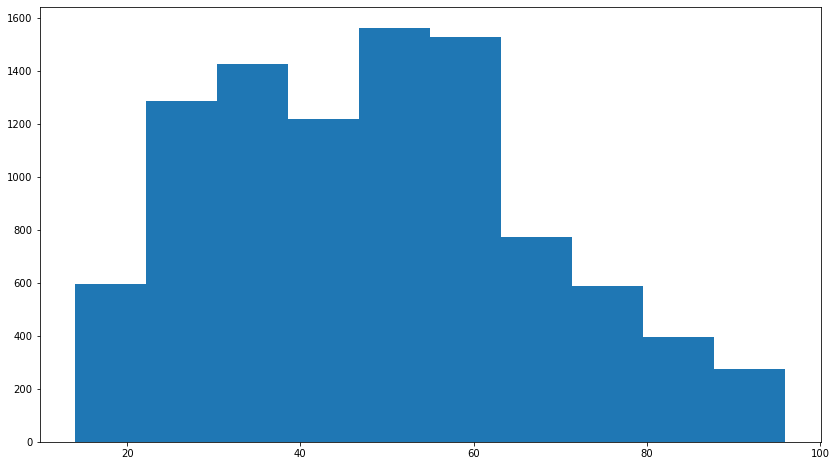

In [27]:
plt.hist(fraud['age'])

In [28]:
#Distribution of age gives us the range 25 years to 60 years.
#This does not point at any particular age group that is involved in the fraudulent transactions

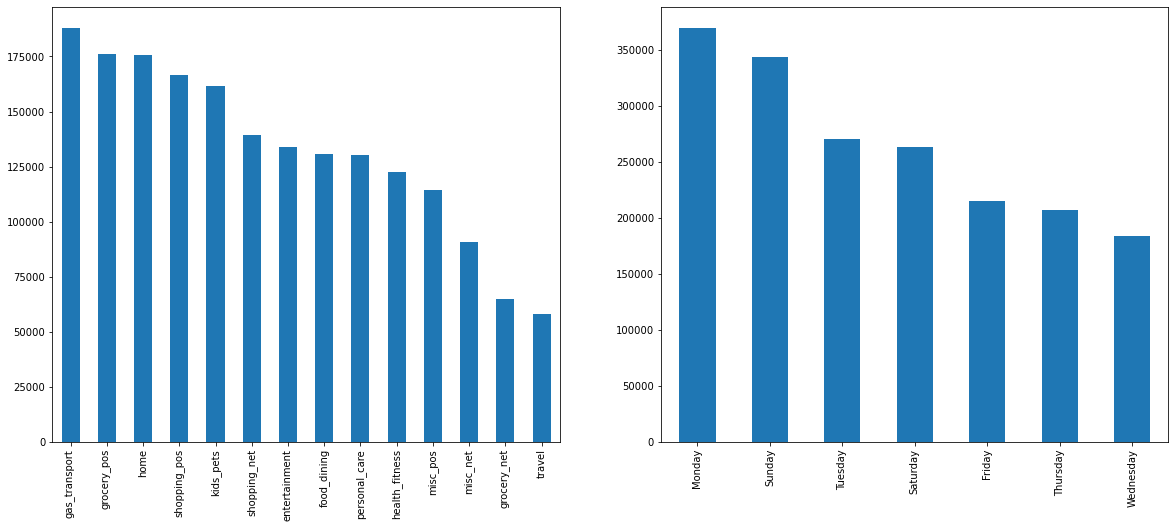

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

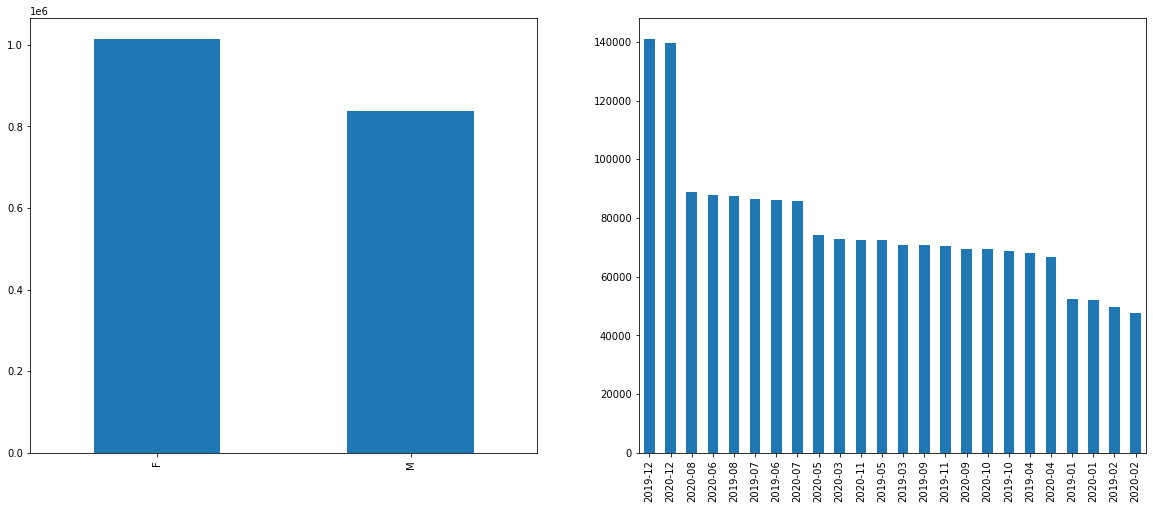

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();

# Model Building

In [31]:
#This data is highly unbalanced, we need to use oversampling technique to balance it

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
os = RandomOverSampler(sampling_strategy=1)

In [34]:
X = df_encoded.drop(columns = 'Class')
Y = df_encoded['Class']

In [35]:
X1,Y1 = os.fit_sample(X,Y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X1,Y1,test_size=.30)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
credit_lr = LogisticRegression().fit(X_train,Y_train)

In [39]:
y_train_pred = credit_lr.predict(X_train)
y_test_pred = credit_lr.predict(X_test)

In [40]:
y_train_pred.shape,X_train.shape

((2579840,), (2579840, 24))

In [41]:
y_test_pred.shape,X_test.shape

((1105646,), (1105646, 24))

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
print(confusion_matrix(Y_train, y_train_pred))
print(classification_report(Y_train, y_train_pred))

[[1010005  279664]
 [ 316224  973947]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77   1289669
           1       0.78      0.75      0.77   1290171

    accuracy                           0.77   2579840
   macro avg       0.77      0.77      0.77   2579840
weighted avg       0.77      0.77      0.77   2579840



In [44]:
accuracy_score(Y_test,y_test_pred)

0.7696342228887003

In [45]:
#Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(
    n_estimators=15, max_depth=50, max_features=12, min_samples_leaf=100, random_state=100
)

In [66]:
%%time
rf.fit(X_train,Y_train)

Wall time: 2min 23s


RandomForestClassifier(max_depth=50, max_features=12, min_samples_leaf=100,
                       n_estimators=15, random_state=100)

In [67]:
from sklearn.metrics import roc_auc_score

In [68]:
print("Score: ", roc_auc_score(Y_test,rf.predict(X_test)))

Score:  0.9922641454850527


In [69]:
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [70]:
print(confusion_matrix(Y_train, Y_train_pred))
print(classification_report(Y_train, Y_train_pred))

[[1270044   19625]
 [      0 1290171]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1289669
           1       0.99      1.00      0.99   1290171

    accuracy                           0.99   2579840
   macro avg       0.99      0.99      0.99   2579840
weighted avg       0.99      0.99      0.99   2579840



In [71]:
print(confusion_matrix(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

[[544517   8557]
 [     0 552572]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553074
           1       0.98      1.00      0.99    552572

    accuracy                           0.99   1105646
   macro avg       0.99      0.99      0.99   1105646
weighted avg       0.99      0.99      0.99   1105646



In [72]:
df_train_merge = df_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_pred = pd.DataFrame(Y_train_pred)
df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})

In [73]:
df_test_merge = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_pred = pd.DataFrame(Y_test_pred)
df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})

In [74]:
df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)

In [75]:
# Creating month and year columns

df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0.0,0,1.0,2019.0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0.0,1,1.0,2019.0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0.0,1,1.0,2019.0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0.0,0,1.0,2019.0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0.0,1,1.0,2019.0


In [76]:
# Group by variable creation

g = df_merge_final.groupby(["year","month"])

In [77]:
# Number of transactions per month

g.trans_num.count()

year    month
2019.0  1.0       52525
        2.0       49866
        3.0       70939
        4.0       68078
        5.0       72532
        6.0       86064
        7.0       86596
        8.0       87359
        9.0       70652
        10.0      68758
        11.0      70421
        12.0     141060
2020.0  1.0       52202
        2.0       47791
        3.0       72850
        4.0       66892
        5.0       74343
        6.0       87805
        7.0       85848
        8.0       88759
        9.0       69533
        10.0      69348
        11.0      72635
        12.0     139538
Name: trans_num, dtype: int64

In [78]:
# Average number of transactions per month

df_merge_final.trans_num.count()/24

77183.08333333333

In [79]:
# Average Number of fraudulent transactions per month

df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24

402.125

In [80]:
# Average amount per fraud transaction

df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

530.6614122888789

In [81]:
# Average number of transactions per month detected as fraud by the model

df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

39179.833333333336

In [82]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

199.25